- **Linear Data**
    - Logistic regression
    - SVM(support Vector Machine)
- **Non-Linear Data**
    - KNN / Lazy algorithm   ---> it takes all the points to calculate the distance(disadv)
    - DecisionTree
    - Random Forest
    - Naive Bayes Classifier
    

### Decision Tree 

- can also be used as regressor and classification
- It has many algorithms like
    - id3
        - it makes the decision tree based on the parameters called entropy, information gain
    - cart (both regression and classification)
        - we use gini index

- **Decision Tree Algorithms**

- we use by gini or information gain & entropy , it tries to caculate all the features.

- ***id3*** (here entropy value is decreased and information gain will increase)
    - here we have logorithmic part in calculation part
    - Entropy
        - measure of uncertanity (or) disorder while predicting the data ---> which means when we have data in mixed way it tries to calculate each feature entropy and based on the highest entropy it split the data .
        - On what bases the split is performed first is the root node and next is again split if needed by next highest entropy here node is decision node and at end we get leaf node.
    - Information gain 
      - difference between entropy before and after splitting the data
- ***cart***
    - it tries to calculate the gini index

- **Disadvantages**
- Overfitting(low bais and high variance)
- it divdes the tree based on one condition only and cannot give the good result while predicting the test data
- so this problem can be ovecome using random forest classifier

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

### Using id3 algorithm

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

In [6]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [13]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [14]:
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris_df['target'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
x = iris_df.drop('target',axis = 1)

In [17]:
y = iris_df['target']

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.3,random_state = 25)

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
y_pred = model.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

accuracy_score(y_test,y_pred)

0.9523809523809523

In [34]:
confusion_matrix(y_test,y_pred)

array([[36,  0,  0],
       [ 0, 32,  5],
       [ 0,  0, 32]], dtype=int64)

In [24]:
precision_score(y_test,y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

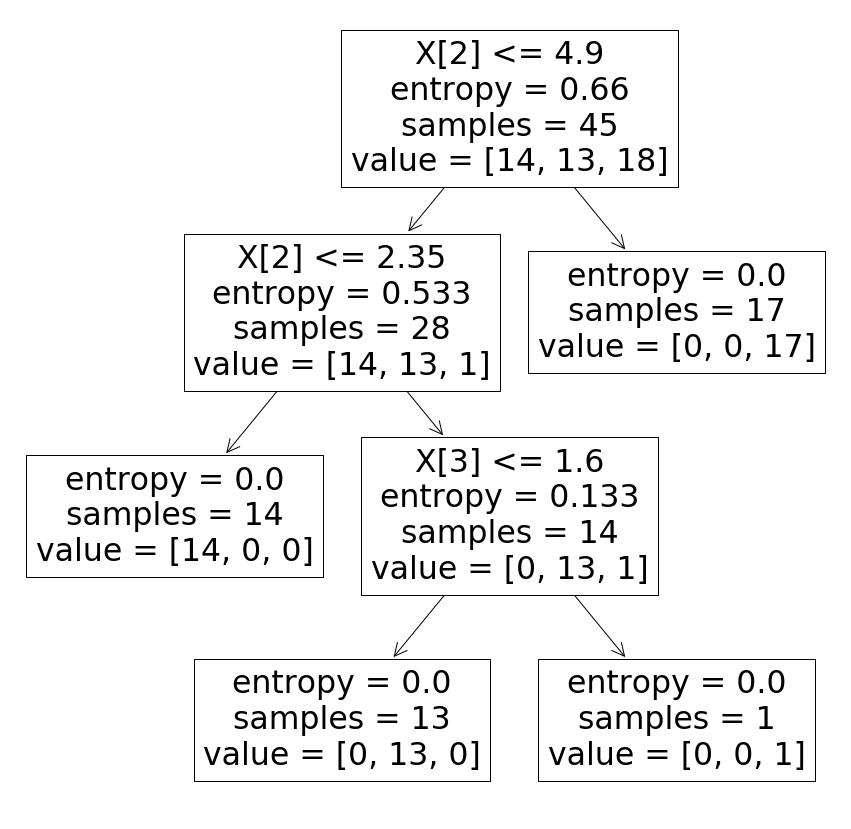

In [35]:
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
y_pred = model.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

accuracy_score(y_test,y_pred)

0.9523809523809523

In [29]:
confusion_matrix(y_test,y_pred)

array([[36,  0,  0],
       [ 0, 32,  5],
       [ 0,  0, 32]], dtype=int64)

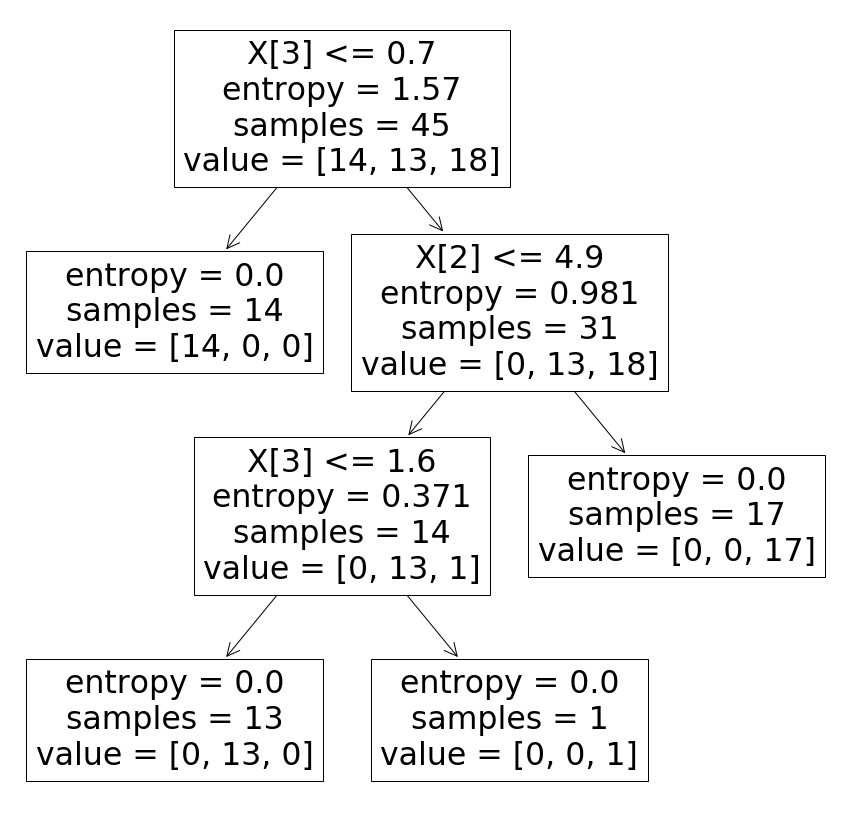

In [30]:
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

In [4]:
### apply the heartdisease dataset to decision tree algorithm and compare the accuracy

df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/Heart_disease.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
df.drop("Unnamed: 0",axis = 1,inplace =True)

In [7]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [8]:
df['Thal'].replace(np.nan,'fixed',inplace =True)

In [9]:
df['Thal'].unique()

array(['fixed', 'normal', 'reversable'], dtype=object)

In [10]:
df['Ca'].replace(np.nan,0,inplace = True)

In [11]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [16]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [17]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['ChestPain'] = label.fit_transform(df['ChestPain'])
df['Thal'] = label.fit_transform(df['Thal'])
df['AHD'] = label.fit_transform(df['AHD'])

In [18]:
x = df[df.columns[:-1]]
y = df['AHD']

In [13]:
x

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal
6,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal
7,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal
8,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable
9,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable


In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 40)

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion= 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

accuracy_score(y_test,y_pred)

0.7362637362637363

In [27]:
confusion_matrix(y_test,y_pred)

array([[45,  6],
       [12, 28]], dtype=int64)

In [28]:
precision_score(y_test,y_pred)

0.8235294117647058

In [29]:
recall_score(y_test,y_pred)

0.7

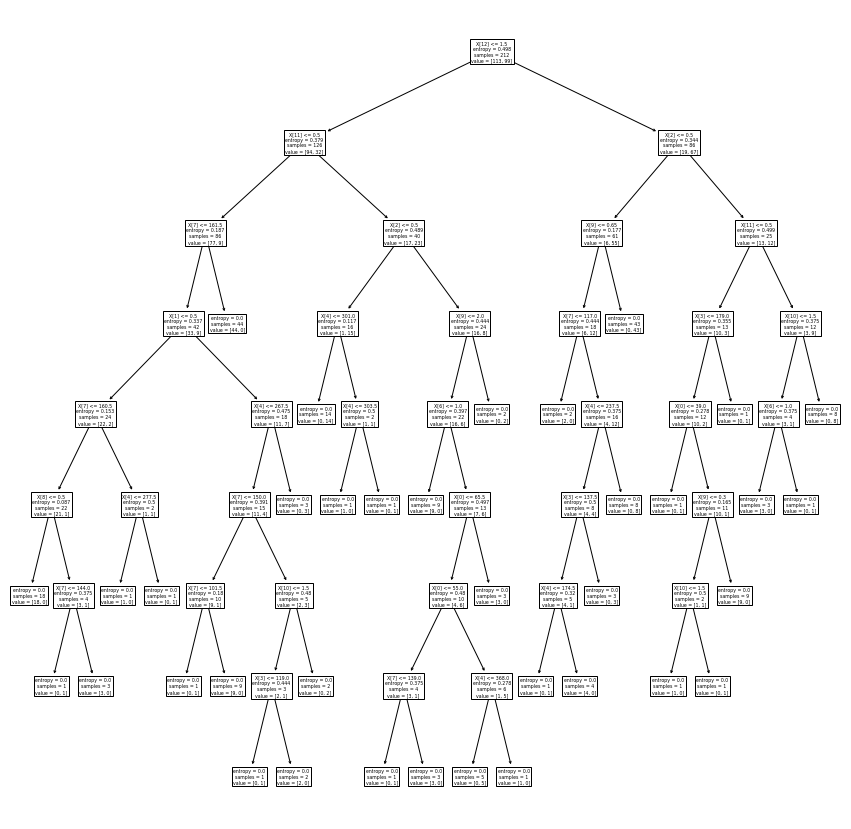

In [26]:
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion= 'gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
y_pred = model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

accuracy_score(y_test,y_pred)

0.7472527472527473

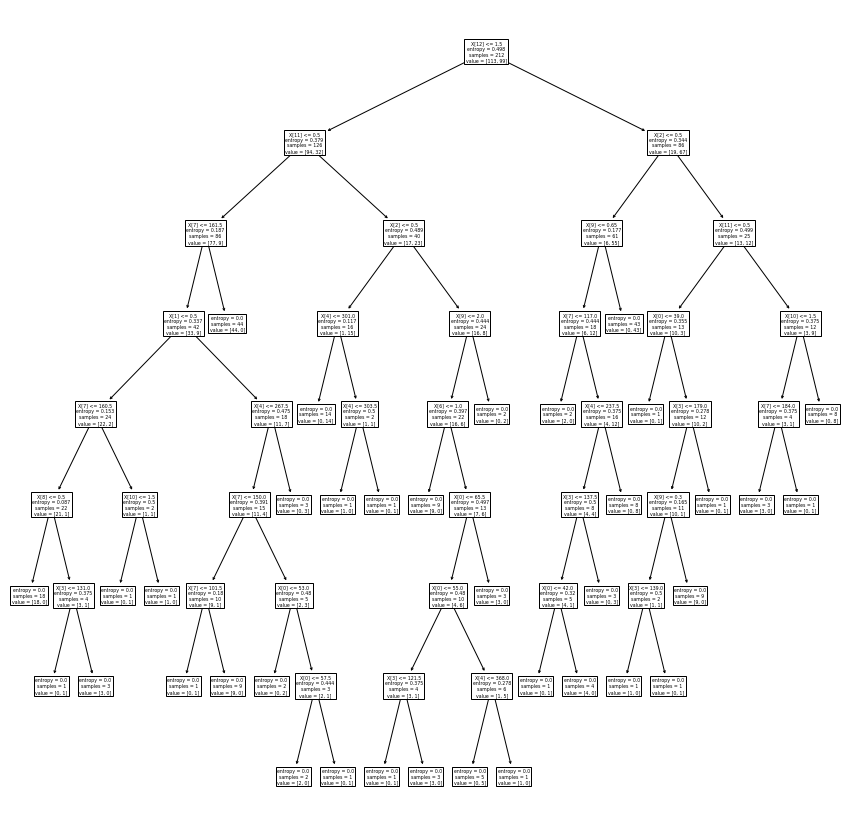

In [33]:
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(model)
plt.show()

In [34]:
confusion_matrix(y_test,y_pred)

array([[43,  8],
       [15, 25]], dtype=int64)

In [35]:
precision_score(y_test,y_pred)

0.7575757575757576

In [36]:
recall_score(y_test,y_pred)

0.625

### Decision tree regressor

- we use this when we have continuous target values.
- Based on some values it tries to split the data.
- when new data point is given then it tries to find the all similarties  and gives the output
- it tries to give the average point of the data similarities it present


In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/age_salary_hours.csv")

In [38]:
df.head()

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher


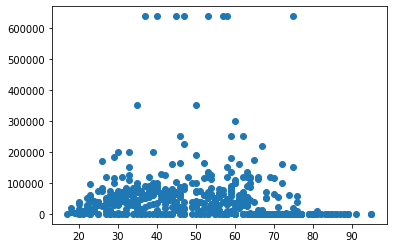

In [39]:
plt.scatter(df['Age'],df['Annual Salary'])

In [40]:
df.isna().sum()

Age              0
Annual Salary    0
Weekly hours     0
Education        0
dtype: int64

In [44]:
 x = df.loc[:,['Age','Weekly hours']]

In [45]:
y = df['Annual Salary']

In [46]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =25)

In [54]:
from sklearn.tree  import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [55]:
y_pred = model.predict(x_test)

In [56]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score(y_test,y_pred)*100

28.30682281030873

In [57]:
mean_squared_error(y_test,y_pred)

7341178028.966463

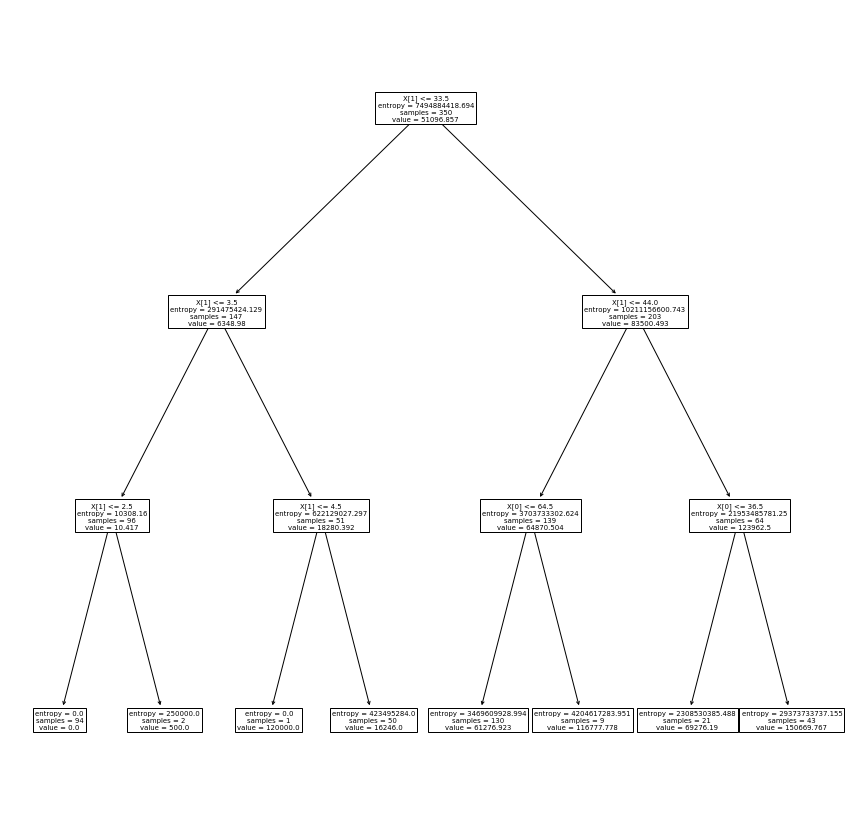

In [58]:
plt.figure(figsize = (15,15))
tree.plot_tree(model)
plt.show()

### Task 

- insurance dataset by regressor and decision tree

In [1]:
import pandas as pd
df = pd.read_csv("insurance.csv")

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df['sex'].replace(['female','male'],[1,0],inplace = True)

In [5]:
df['smoker'].replace(['yes','no'],[0,1],inplace = True)

In [6]:
df.drop('region',axis =1,inplace =True)

In [7]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,0,16884.92400
1,18,0,33.770,1,1,1725.55230
2,28,0,33.000,3,1,4449.46200
3,33,0,22.705,0,1,21984.47061
4,32,0,28.880,0,1,3866.85520


In [36]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = scale.fit_transform(x)
y = df['charges']

In [23]:
y.unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.3,random_state = 25)

In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion= 'entropy')
model.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

In [26]:
x.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')

In [27]:
y.keys()

RangeIndex(start=0, stop=1338, step=1)

In [28]:
x_train.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')

In [29]:
y_train.keys()

Int64Index([ 355,   46,  750,  275,  913,  472,  524,  610,  379, 1085,
            ...
            1160,  765,  940, 1175,  255,  886,  143,  474,  318, 1156],
           dtype='int64', length=401)

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 40)

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 318 to 219
Data columns (total 5 columns):
age         936 non-null int64
sex         936 non-null int64
bmi         936 non-null float64
children    936 non-null int64
smoker      936 non-null int64
dtypes: float64(1), int64(4)
memory usage: 43.9 KB


In [34]:
y_train.info()

AttributeError: 'Series' object has no attribute 'info'

In [35]:
type(y_train)

pandas.core.series.Series